In [1]:
!pip install contractions


In [2]:
!pip install faker


In [3]:
import random
import pandas as pd
from faker import Faker

fake = Faker()
random.seed(42)

# Define risk levels
risk_levels = ['safe', 'at_risk', 'immediate_danger']

# Sentences for each risk level
def generate_sentence(label, fake_case=False):
    emojis = {
        'safe': ['🙂', '💚', '✨', '🌻'],
        'at_risk': ['😟', '💔', '😥', '😓'],
        'immediate_danger': ['😰', '💢', '🆘', '💀']
    }
    children_mentions = [
        "my kids were home", "our daughter asked why we were yelling",
        "he never gets violent when the kids are around", "I told the children to stay in their room"
    ]
    calm_day = [
        "Today was peaceful", "We didn't argue at all today", "Everything felt calm for once", 
        "I even smiled today 🙂"
    ]
    at_risk_cases = [
        "He yelled at me again, but didn’t hit me", 
        "He came home drunk and punched the wall", 
        "He threw my phone across the room 💔", 
        "I locked myself in the bathroom to avoid him"
    ]
    danger_cases = [
        "He strangled me while I was screaming 🆘", 
        "I ran out barefoot after he pulled a knife 💀", 
        "He threatened to kill me and the kids", 
        "I sent my sister a voice note before he smashed my phone"
    ]
    manipulative_safe = [
        "I said he hit me but I just wanted him out", 
        "I reported him because I wanted custody of our child", 
        "I told my mom I was scared even though we were okay"
    ]
    
    base = ""
    if fake_case:
        base = random.choice(manipulative_safe)
    elif label == 'safe':
        base = random.choice(calm_day)
    elif label == 'at_risk':
        base = random.choice(at_risk_cases)
    elif label == 'immediate_danger':
        base = random.choice(danger_cases)
        
    # Occasionally add children context
    if random.random() < 0.3:
        base += ". " + random.choice(children_mentions)
        
    # Occasionally add emojis
    if random.random() < 0.6:
        base += " " + random.choice(emojis[label])
    
    return base.strip()

# Generate dataset
data = []
for label in risk_levels:
    for _ in range(500):
        is_fake = False
        if label in ['at_risk', 'immediate_danger'] and random.random() < 0.1:
            is_fake = True
        entry = {
            'text': generate_sentence(label, fake_case=is_fake),
            'risk_level': label,
            'age': random.randint(18, 65),
            'is_fake_report': is_fake
        }
        data.append(entry)

# Create DataFrame
df = pd.DataFrame(data)

# Shuffle it
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Export to CSV
df.to_csv("femicide_simulated_dataset.csv", index=False)

print("✅ Dataset generated and saved as 'femicide_simulated_dataset.csv'")


✅ Dataset generated and saved as 'femicide_simulated_dataset.csv'


In [4]:
import pandas as pd
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ngati/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
#loading datset
df = pd.read_csv('femicide_simulated_dataset.csv')
df.head()

,text,risk_level,age,is_fake_report
0,I reported him because I wanted custody of our...,immediate_danger,57,True
1,He strangled me while I was screaming 🆘. our d...,immediate_danger,46,False
2,I even smiled today 🙂 🙂,safe,20,False
3,Today was peaceful. he never gets violent when...,safe,52,False
4,Today was peaceful 🙂,safe,18,False


In [6]:
df.shape

(1500, 4)

In [7]:
#checking for the class distribution
print(df['risk_level'].value_counts())
# Sample from each class
for label in df['risk_level'].unique():
    print(f"\n=== {label.upper()} ===")
    print(df[df['risk_level'] == label]['text'].sample(2).values)


risk_level
immediate_danger    500
safe                500
at_risk             500
Name: count, dtype: int64

=== IMMEDIATE_DANGER ===
['He strangled me while I was screaming 🆘. our daughter asked why we were yelling 💀'
 'I ran out barefoot after he pulled a knife 💀 💢']

=== SAFE ===
['I even smiled today 🙂. our daughter asked why we were yelling ✨'
 "We didn't argue at all today ✨"]

=== AT_RISK ===
['He came home drunk and punched the wall'
 'He came home drunk and punched the wall. I told the children to stay in their room 😟']


In [8]:
# data cleaning

print("\n Missing values per column:\n", df.isnull().sum())

# Optional: View percentage of missing values
missing_percent = df.isnull().mean() * 100
print("\n Missing % per column:\n", missing_percent)

# Display sample rows with missing values (if any)
if df.isnull().values.any():
    display(df[df.isnull().any(axis=1)].head())
else:
    print("\n No missing values found.")


 Missing values per column:
 text              0
risk_level        0
age               0
is_fake_report    0
dtype: int64

 Missing % per column:
 text              0.0
risk_level        0.0
age               0.0
is_fake_report    0.0
dtype: float64

 No missing values found.


In [9]:
# Simply delete the df_clean variable if it exists
if 'df_clean' in locals():
    del df_clean

# Reload the full original dataset if needed
import pandas as pd

df = pd.read_csv("femicide_simulated_dataset.csv")

# Quick check of what's available
print(df.columns)
df.head(10)


Index(['text', 'risk_level', 'age', 'is_fake_report'], dtype='object')


,text,risk_level,age,is_fake_report
0,I reported him because I wanted custody of our...,immediate_danger,57,True
1,He strangled me while I was screaming 🆘. our d...,immediate_danger,46,False
2,I even smiled today 🙂 🙂,safe,20,False
3,Today was peaceful. he never gets violent when...,safe,52,False
4,Today was peaceful 🙂,safe,18,False
5,He threw my phone across the room 💔 💔,at_risk,23,False
6,I sent my sister a voice note before he smashe...,immediate_danger,63,False
7,He threw my phone across the room 💔. he never ...,at_risk,63,False
8,He strangled me while I was screaming 🆘,immediate_danger,48,False
9,Everything felt calm for once 🙂,safe,51,False


In [10]:
print(df['text'].head(10))  # Show first 10 rows
print(df['text'].apply(lambda x: isinstance(x, str)).value_counts())  # How many are valid strings?
print(df['text'].apply(lambda x: len(str(x).strip())).describe())  # Length of text values


0    I reported him because I wanted custody of our...
1    He strangled me while I was screaming 🆘. our d...
2                              I even smiled today 🙂 🙂
3    Today was peaceful. he never gets violent when...
4                                 Today was peaceful 🙂
5                He threw my phone across the room 💔 💔
6    I sent my sister a voice note before he smashe...
7    He threw my phone across the room 💔. he never ...
8              He strangled me while I was screaming 🆘
9                      Everything felt calm for once 🙂
Name: text, dtype: object
text
True    1500
Name: count, dtype: int64
count    1500.000000
mean       49.166667
std        21.313041
min        18.000000
25%        37.000000
50%        42.000000
75%        61.000000
max       106.000000
Name: text, dtype: float64


In [11]:
df.shape


(1500, 4)

In [12]:
# Data cleaning
def clean_text(text):
    text = str(text).strip()  # Just remove leading/trailing whitespace
    text = re.sub(r'\s+', ' ', text)  # Normalize multiple spaces
    return text


In [13]:
df['clean_text'] = df['text'].apply(clean_text)

# See how many rows were reduced to empty
print("Empty after cleaning:", (df['clean_text'].str.strip() == '').sum())
print(df[['text', 'clean_text']].sample(5))  # Sample to verify visually


Empty after cleaning: 0
                                                   text  \
398             He threatened to kill me and the kids 😰   
1399                              I even smiled today 🙂   
815        I ran out barefoot after he pulled a knife 💀   
63    Everything felt calm for once. our daughter as...   
374           He strangled me while I was screaming 🆘 💢   

                                             clean_text  
398             He threatened to kill me and the kids 😰  
1399                              I even smiled today 🙂  
815        I ran out barefoot after he pulled a knife 💀  
63    Everything felt calm for once. our daughter as...  
374           He strangled me while I was screaming 🆘 💢  


In [14]:
df['clean_text'].shape


(1500,)

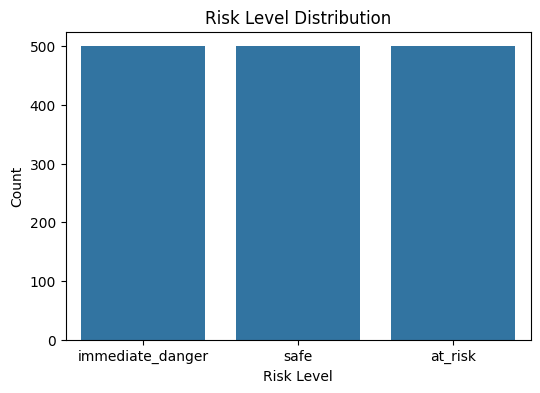

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of risk levels
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='risk_level', order=df['risk_level'].value_counts().index)
plt.title("Risk Level Distribution")
plt.ylabel("Count")
plt.xlabel("Risk Level")
plt.show()


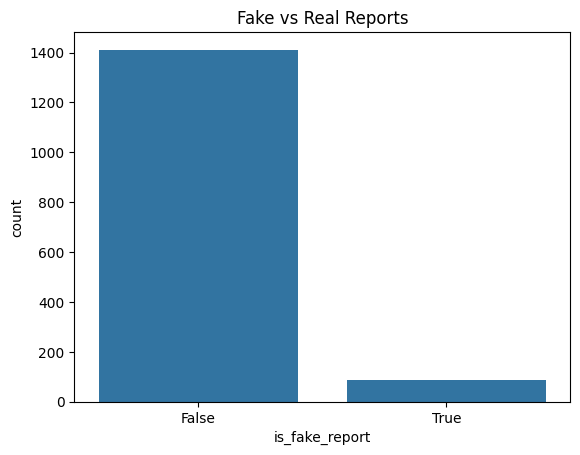

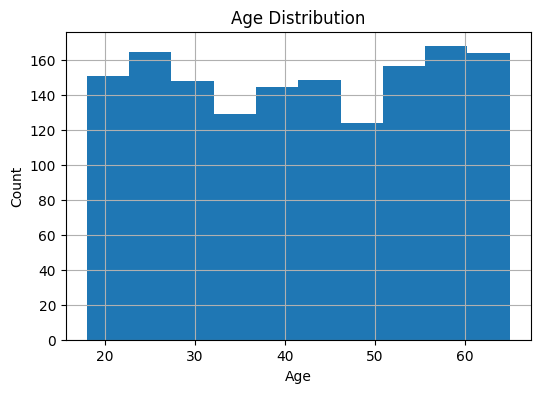

In [16]:
# Fake report distribution
sns.countplot(data=df, x='is_fake_report')
plt.title("Fake vs Real Reports")
plt.show()

# Age distribution
df['age'].hist(bins=10, figsize=(6, 4))
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()



In [17]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
def count_words(text):
    return len(text.split())

def count_sentences(text):
    return text.count('.') + text.count('!') + text.count('?')

def count_all_caps(text):
    return sum(1 for word in text.split() if word.isupper())

def count_exclamations(text):
    return text.count('!')

# Risk keywords list (you can expand this)
risk_keywords = [
    'kill', 'hit', 'beat', 'threat', 'knife', 'gun', 'blood', 
    'abuse', 'danger', 'violence', 'escape', 'scream', 'stab', 'rape'
]

def contains_risk_keywords(text):
    text = text.lower()
    return any(keyword in text for keyword in risk_keywords)

df['clean_text'] = df['text'].apply(clean_text)

In [18]:
df['has_risk_keywords'] = df['text'].apply(contains_risk_keywords).astype(int)
df['word_count'] = df['text'].apply(count_words)
df['sentence_count'] = df['text'].apply(count_sentences)
df['all_caps_count'] = df['text'].apply(count_all_caps)
df['exclamation_count'] = df['text'].apply(count_exclamations)


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = vectorizer.fit_transform(df['text'])

# Save the vectorizer for deployment
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)



In [20]:
from scipy.sparse import hstack

meta_features = df[['has_risk_keywords', 'word_count', 'sentence_count', 'all_caps_count', 'exclamation_count']]
X_full = hstack([X_tfidf, meta_features])

In [21]:
y = df['risk_level']  # or df['encoded_risk'] if you encode


In [22]:
!pip install nrclex


In [23]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Basic Text Features
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['sentence_count'] = df['text'].apply(lambda x: len(re.split(r'[.!?]', str(x))) - 1)
df['uppercase_count'] = df['text'].apply(lambda x: sum(1 for w in str(x).split() if w.isupper()))
df['exclamation_count'] = df['text'].apply(lambda x: str(x).count('!'))

# 2. Subjectivity & Polarity (Emotion)
df['subjectivity_score'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df['sentiment_score'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# 3. Risk Keyword Count
risk_keywords = ['kill', 'hurt', 'stab', 'beat', 'abuse', 'die', 'murder', 'choke', 'hit', 'rape', 'blood']
df['risk_keyword_count'] = df['text'].apply(
    lambda x: sum(1 for word in str(x).lower().split() if word in risk_keywords)
)

# 4. Sentiment vs Risk Level Mismatch
def check_mismatch(row):
    if row['risk_level'] == 'safe' and row['sentiment_score'] < -0.2:
        return 1
    elif row['risk_level'] == 'immediate_danger' and row['sentiment_score'] > 0.2:
        return 1
    else:
        return 0

df['sentiment_risk_mismatch'] = df.apply(check_mismatch, axis=1)

# 5. TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2), stop_words='english')
X_tfidf = vectorizer.fit_transform(df['text'])
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# 6. Combine All Features
meta_features = df[[
    'word_count', 'sentence_count', 'uppercase_count', 'exclamation_count',
    'subjectivity_score', 'sentiment_score', 'risk_keyword_count',
    'sentiment_risk_mismatch'
]].reset_index(drop=True)

X_final = pd.concat([meta_features, tfidf_df], axis=1)

# 7. Target
y = df['risk_level']

# Print shape to verify
print("Final feature shape:", X_final.shape)
print("Target distribution:\n", y.value_counts())


Final feature shape: (1500, 157)
Target distribution:
 risk_level
immediate_danger    500
safe                500
at_risk             500
Name: count, dtype: int64


C:\Users\ngati\AppData\Local\Temp\ipykernel_38036\3258131801.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='risk_level', y='sentiment_score', palette='Set2')


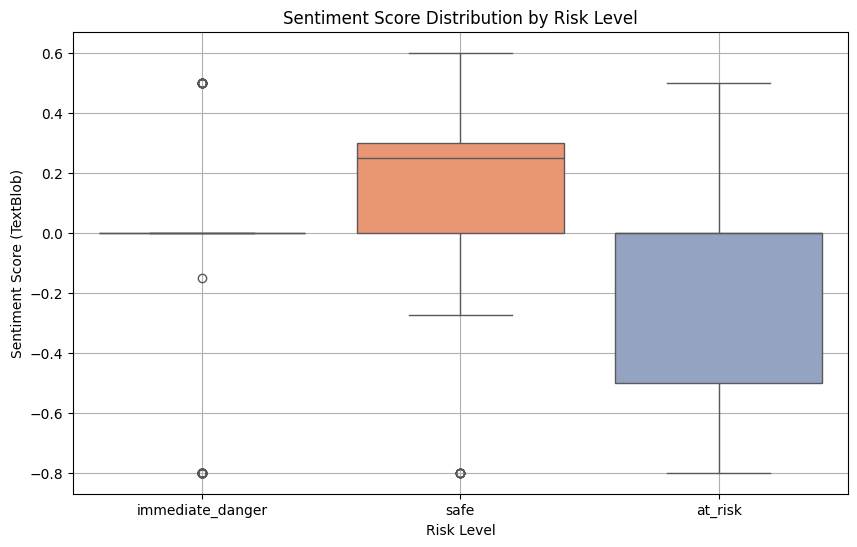

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='risk_level', y='sentiment_score', palette='Set2')
plt.title('Sentiment Score Distribution by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Sentiment Score (TextBlob)')
plt.grid(True)
plt.show()


C:\Users\ngati\AppData\Local\Temp\ipykernel_38036\3334880234.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='risk_level', y='risk_keyword_count', palette='Set3')


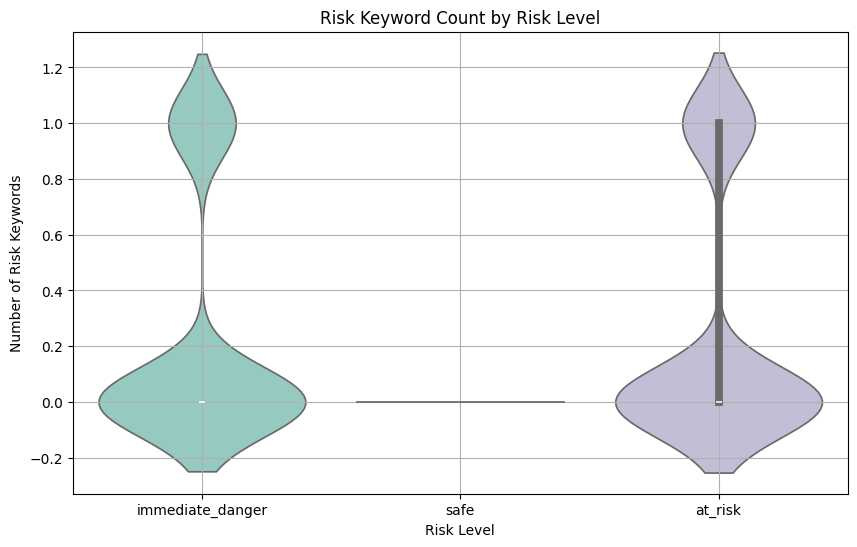

In [25]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='risk_level', y='risk_keyword_count', palette='Set3')
plt.title('Risk Keyword Count by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Number of Risk Keywords')
plt.grid(True)
plt.show()


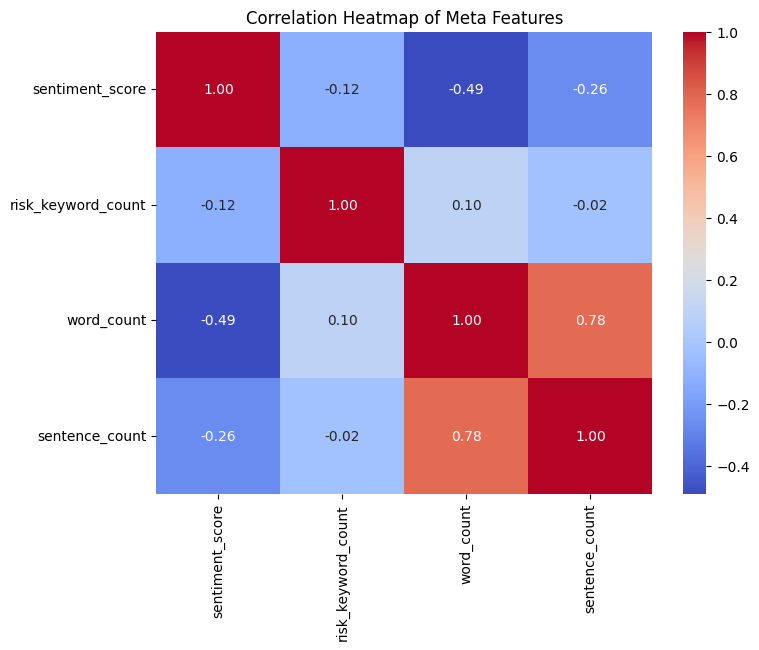

In [26]:
meta_features = ['sentiment_score', 'risk_keyword_count', 'word_count', 'sentence_count']

plt.figure(figsize=(8, 6))
sns.heatmap(df[meta_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Meta Features')
plt.show()


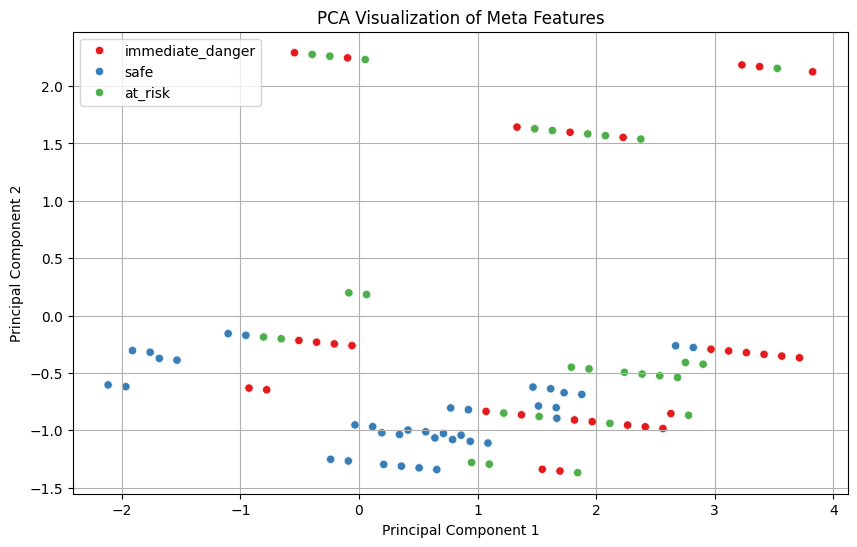

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
X_scaled = StandardScaler().fit_transform(df[meta_features])

# PCA to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

# Plot PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='risk_level', palette='Set1')
plt.title('PCA Visualization of Meta Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
df['clean_text'].shape


(1500,)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\ngati\anaconda3\envs\learn-env\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Parameters: {'clf__C': 10, 'clf__penalty': 'l1', 'tfidf__max_df': 0.8, 'tfidf__min_df': 5}
Best CV Score: 0.9866666666666667

Classification Report:
                   precision    recall  f1-score   support

         at_risk       1.00      0.95      0.97       100
immediate_danger       0.95      1.00      0.98       100
            safe       1.00      1.00      1.00       100

        accuracy                           0.98       300
       macro avg       0.98      0.98      0.98       300
    weighted avg       0.98      0.98      0.98       300



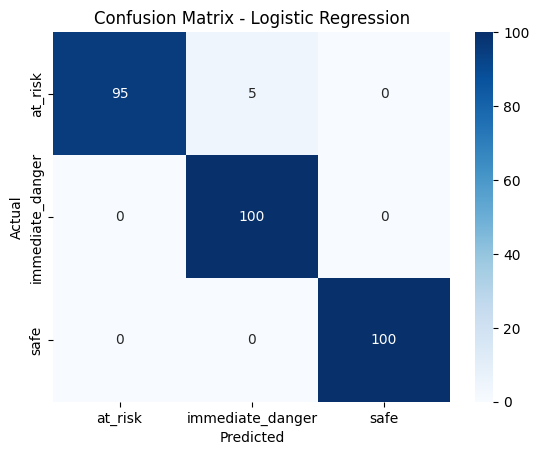

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# =======================
# 1. Load Your Dataset
# =======================


# Features & target
X = df['clean_text']   # keep emojis
y = df['risk_level']   # safe, at_risk, immediate_danger

# Train-test split (stratify to keep balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =======================
# 2. Pipeline
# =======================
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        lowercase=True,
        analyzer='word',
        token_pattern=r'(?u)\b\w+\b|[^\w\s]',  # keep emojis/symbols
        ngram_range=(1,2),
        max_features=5000
    )),
    ('clf', LogisticRegression(multi_class='ovr', solver='liblinear'))
])

# =======================
# 3. Hyperparameter Tuning
# =======================
param_grid = {
    'tfidf__max_df': [0.8, 0.9, 1.0],
    'tfidf__min_df': [1, 2, 5],
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__penalty': ['l1', 'l2']
}

grid = GridSearchCV(
    pipeline, param_grid,
    scoring='recall_macro',  # recall for all classes
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Train
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

# =======================
# 4. Evaluation
# =======================
y_pred = grid.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=grid.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()






In [30]:
from sklearn.metrics import classification_report

# Training performance
y_train_pred = grid.predict(X_train)
print("\nTRAINING PERFORMANCE")
print(classification_report(y_train, y_train_pred))

# Test performance
y_test_pred = grid.predict(X_test)
print("\nTEST PERFORMANCE")
print(classification_report(y_test, y_test_pred))



TRAINING PERFORMANCE
                  precision    recall  f1-score   support

         at_risk       1.00      0.97      0.99       400
immediate_danger       0.98      1.00      0.99       400
            safe       1.00      1.00      1.00       400

        accuracy                           0.99      1200
       macro avg       0.99      0.99      0.99      1200
    weighted avg       0.99      0.99      0.99      1200


TEST PERFORMANCE
                  precision    recall  f1-score   support

         at_risk       1.00      0.95      0.97       100
immediate_danger       0.95      1.00      0.98       100
            safe       1.00      1.00      1.00       100

        accuracy                           0.98       300
       macro avg       0.98      0.98      0.98       300
    weighted avg       0.98      0.98      0.98       300



In [31]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split
X = df[['clean_text', 'word_count', 'sentiment_score']]  # Example features
y = df['risk_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Define vectorizer and preprocessor
text_features = 'clean_text'
meta_features = ['word_count',  'sentiment_score']

preprocessor = ColumnTransformer(transformers=[
    ('text', TfidfVectorizer(), text_features),
    ('meta', StandardScaler(), meta_features)
])

# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Fit
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text', TfidfVectorizer(),
                                                  'clean_text'),
                                                 ('meta', StandardScaler(),
                                                  ['word_count',
                                                   'sentiment_score'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [32]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


                  precision    recall  f1-score   support

         at_risk       0.97      0.94      0.95       125
immediate_danger       0.94      0.97      0.95       125
            safe       1.00      1.00      1.00       125

        accuracy                           0.97       375
       macro avg       0.97      0.97      0.97       375
    weighted avg       0.97      0.97      0.97       375



In [33]:
print(df['risk_level'].value_counts(normalize=True))


risk_level
immediate_danger    0.333333
safe                0.333333
at_risk             0.333333
Name: proportion, dtype: float64


In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


                  precision    recall  f1-score   support

         at_risk       0.97      0.94      0.95       125
immediate_danger       0.94      0.97      0.95       125
            safe       1.00      1.00      1.00       125

        accuracy                           0.97       375
       macro avg       0.97      0.97      0.97       375
    weighted avg       0.97      0.97      0.97       375



<Axes: xlabel='risk_level', ylabel='word_count'>

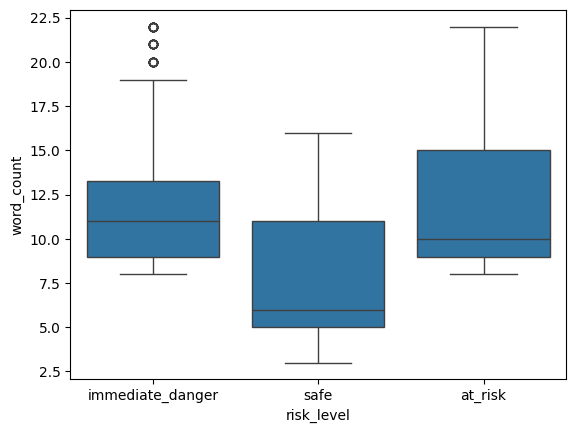

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=df, x='risk_level', y='word_count')


In [36]:
!pip install --upgrade transformers


In [37]:
import transformers
print(transformers.__version__)


C:\Users\ngati\anaconda3\envs\learn-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


4.55.0


In [ ]:
import transformers
print(transformers.__file__)

from transformers import TrainingArguments
help(TrainingArguments)


In [51]:
# ===============================
# 1. Install & Import Libraries
# ===============================
!pip install transformers datasets scikit-learn --quiet

import torch
import numpy as np
import pandas as pd
import re
from sklearn.metrics import classification_report
from transformers import (
    DistilBertTokenizerFast,
    DistilBertForSequenceClassification,
    Trainer,
    TrainingArguments
)
from datasets import Dataset

# ===============================
# 2. Clean Text
# ===============================
def clean_text_fn(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove URLs
    text = re.sub(r"[^a-zA-Z\s]", '', text)              # remove punctuation
    text = re.sub(r"\s+", ' ', text).strip()             # remove extra spaces
    return text

df["clean_text"] = df["text"].apply(clean_text_fn)

# ===============================
# 3. Encode Labels
# ===============================
df = df.loc[:, ~df.columns.duplicated()]
df = df[["clean_text", "labels"]]  # 'labels' contains string classes

# Create label-to-ID mapping
label_map = {label: idx for idx, label in enumerate(sorted(df["labels"].unique()))}
reverse_map = {v: k for k, v in label_map.items()}  # for decoding later

# Apply mapping
df["labels"] = df["labels"].map(label_map).astype(int)

# Rename for tokenizer compatibility
df = df.rename(columns={"clean_text": "text"})

# ===============================
# 4. Convert to HF Dataset
# ===============================
dataset = Dataset.from_pandas(df, preserve_index=False)
dataset = dataset.train_test_split(test_size=0.2, seed=42)
train_dataset = dataset["train"]
test_dataset = dataset["test"]

# ===============================
# 5. Tokenization
# ===============================
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

def tokenize_function(batch):
    return tokenizer(
        batch["text"],
        truncation=True,
        padding="max_length",
        max_length=128
    )

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

train_dataset = train_dataset.remove_columns(["text"])
test_dataset = test_dataset.remove_columns(["text"])
train_dataset.set_format("torch")
test_dataset.set_format("torch")

# ===============================
# 6. Load Model
# ===============================
num_labels = len(label_map)
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=num_labels
)

# ===============================
# 7. Define Metrics
# ===============================
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    report = classification_report(labels, predictions, output_dict=True, zero_division=0)
    return {
        "accuracy": report["accuracy"],
        "precision": np.mean([report[str(i)]["precision"] for i in range(num_labels)]),
        "recall": np.mean([report[str(i)]["recall"] for i in range(num_labels)]),
        "f1": np.mean([report[str(i)]["f1-score"] for i in range(num_labels)])
    }

# ===============================
# 8. Training Arguments
# ===============================
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    eval_strategy="epoch",  # ✅ Updated keyword
    save_strategy="epoch",
    load_best_model_at_end=True,
    save_total_limit=1
)

# ===============================
# 9. Trainer
# ===============================
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# ===============================
# 10. Train Model
# ===============================
trainer.train()

# ===============================
# 11. Save Model & Tokenizer
# ===============================
model.save_pretrained("./distilbert_model")
tokenizer.save_pretrained("./distilbert_model")

# ===============================
# 12. Evaluate Model
# ===============================
metrics = trainer.evaluate()
print(metrics)

# ===============================
# 13. Decode Predictions (Optional)
# ===============================
# predictions = trainer.predict(test_dataset).predictions
# predicted_labels = np.argmax(predictions, axis=-1)
# decoded_labels = [reverse_map[p] for p in predicted_labels]

Map: 100%|██████████████████████████| 300/300 [00:00<00:00, 2018.22 examples/s]
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\ngati\AppData\Local\Temp\ipykernel_38036\2219010839.py:120: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
C:\Users\ngati\anaconda3\envs\learn-env\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.103300,0.083313,0.970000,0.972973,0.972973,0.971831
2,0.077200,0.054395,0.973333,0.975806,0.974386,0.974867
3,0.089800,0.043534,0.986667,0.987327,0.987723,0.987467


C:\Users\ngati\anaconda3\envs\learn-env\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\ngati\anaconda3\envs\learn-env\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\ngati\anaconda3\envs\learn-env\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


{'eval_loss': 0.043533604592084885, 'eval_accuracy': 0.9866666666666667, 'eval_precision': 0.9873265114090802, 'eval_recall': 0.9877230171347818, 'eval_f1': 0.9874669020300089, 'eval_runtime': 41.7604, 'eval_samples_per_second': 7.184, 'eval_steps_per_second': 0.455, 'epoch': 3.0}


In [50]:
import transformers
print(transformers.__file__)
print(transformers.__version__)



C:\Users\ngati\anaconda3\envs\learn-env\Lib\site-packages\transformers\__init__.py
4.55.0


In [47]:
print(df.columns.tolist())

['text', 'labels', 'clean_text']


In [40]:
!which python

/c/Users/ngati/anaconda3/envs/learn-env/python


In [41]:
from transformers import TrainingArguments

In [42]:
import transformers
print(transformers.__version__)

4.55.0


In [43]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
)

TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'

In [52]:
!pip install shap transformers --quiet

In [53]:
!pip install streamlit-shap --quiet

In [54]:
from transformers import pipeline

model_path = "./distilbert_model"

# Load pipeline for text classification
pipe = pipeline(
    "text-classification",
    model=model_path,
    tokenizer=model_path,
    return_all_scores=True  # Ensures SHAP sees all class probabilities
)

Device set to use cpu
C:\Users\ngati\anaconda3\envs\learn-env\Lib\site-packages\transformers\pipelines\text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [55]:
import shap

# Wrap pipeline with SHAP
explainer = shap.Explainer(pipe)

In [56]:
# Example input
text = "She reported threats and physical abuse from her partner."

# Get SHAP values
shap_values = explainer([text])

# Visualize
shap.plots.text(shap_values[0])

PartitionExplainer explainer: 2it [00:41, 41.45s/it]                           


In [58]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model.save_pretrained("./distilbert_model_v2", safe_serialization=False)
tokenizer.save_pretrained("./distilbert_model_v2")

('./distilbert_model_v2\\tokenizer_config.json',
 './distilbert_model_v2\\special_tokens_map.json',
 './distilbert_model_v2\\vocab.txt',
 './distilbert_model_v2\\added_tokens.json',
 './distilbert_model_v2\\tokenizer.json')

In [59]:
import streamlit as st
import shap
from transformers import pipeline
from streamlit_shap import st_shap

# Load model pipeline
pipe = pipeline("text-classification", model="./distilbert_model_v2", tokenizer="./distilbert_model_v2", return_all_scores=True)

# Wrap with SHAP
explainer = shap.Explainer(pipe)

# UI
st.title("Femicide Risk Detection")
text_input = st.text_area("Enter case description:")

if text_input:
    shap_values = explainer([text_input])
    st.subheader("Model Explanation")
    st_shap(shap.plots.text(shap_values[0]), height=300)

Device set to use cpu
C:\Users\ngati\anaconda3\envs\learn-env\Lib\site-packages\transformers\pipelines\text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
2025-08-08 09:18:20.419 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-08 09:18:21.254 
  command:

    streamlit run C:\Users\ngati\anaconda3\envs\learn-env\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-08 09:18:21.258 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-08 09:18:21.266 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-08 09:18:21.276 Thread 'MainThread': missing ScriptRunContext! Th